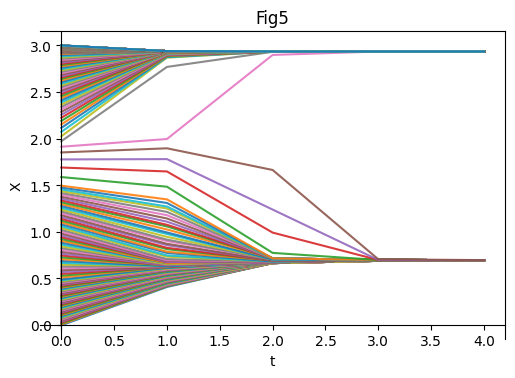

In [118]:
import numpy as np
import matplotlib.pyplot as plt


# 定义智能体数量
num_agents = 751

# 定义初始意见
initial_opinions_1 = np.linspace(-0.5, 2.5, 153)  # 较小族群初始意见
initial_opinions_2 = np.linspace(2.5, 3.5, 598)  # 较大族群初始意见

# 将初始意见合并
opinions = np.concatenate((initial_opinions_1, initial_opinions_2))

# 定义收敛阈值
convergence_threshold = 1e-3

# 定义最大迭代次数
max_iterations = 10000

# 定义意见更新阈值
threshold = 1

# 随机分配权重
weights = np.random.rand(num_agents)

# 存储每个智能体每次迭代的意见
opinions_history = []

# 定义函数，找出距离小于 1 的智能体
def find_neighbours(agent, opinions):
    return np.abs(opinions - agent) < 1

# 定义函数，更新智能体的意见
def update_opinions(opinions, threshold, weights):
    new_opinions = np.copy(opinions)  # 复制一份 opinions
    for i in range(len(opinions)):  # 遍历每一个智能体
        neighbours = find_neighbours(opinions[i], opinions)  # 调用 find_neighbours 找出距离小于 1 的智能体
        # 选出与当前智能体距离小于 1 的智能体的 opinions 差值在阈值内的智能体
        mark = np.abs(opinions - opinions[i]) < threshold
        # 更新 opinions
        new_opinions[i] = np.sum(weights[mark] * opinions[mark]) / np.sum(weights[mark])
    return new_opinions  # 返回更新后的 opinions

# 运行仿真
for _ in range(max_iterations):
    new_opinions = update_opinions(opinions, threshold, weights)  # 更新 opinions
    if np.all(np.abs(new_opinions - opinions) < convergence_threshold):  # 如果 opinions 收敛
        break  # 跳出循环
    opinions = new_opinions  # 更新 opinions
    opinions_history.append(opinions.copy())  # 记录当前时间步的意见值

# 绘制每个智能体的意见随着迭代次数的变化
plt.figure(figsize=(6, 4))
iterations = range(len(opinions_history))  # 迭代次数
for agent in range(num_agents):
    agent_opinions = [history[agent] for history in opinions_history]  # 智能体的 opinions 随迭代的变化
    plt.plot(iterations, agent_opinions, label=f'Agent {agent + 1}', alpha=0.9)

# 将坐标轴移动到左下角
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['bottom'].set_position('zero')

plt.tight_layout()
# 设置横坐标和纵坐标的标签
plt.xlabel('t')
plt.ylabel('X')
plt.title('Fig5')
plt.show()

